# Spain Electricity Shortfall Challenge
## Individual_Work: Advanced Regression Predict

![](electricity1.png)


# Introduction 

With a population of 47.1 million people, Spain is Europe's sixth-largest energy user. Furthermore, because each individual relies on energy for their daily activities, the country has seen a growth in energy consumption, which has necessitated increasing power generation throughout time. include energy derived from fossil fuels and numerous renewable sources.

The goal of this notebook is to assist us in developing the model that the Spanish government will use to forecast the daily gap between energy provided by fossil fuels and energy generated by various renewable sources for Spain. The model's development will also aid the Spanish government in its consideration of expanding renewable energy resource infrastructure expenditures.

##### The problem statement that was formally emailed to you, the senior data scientist  by your management reads as follows:

In this project, you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc.


## Table of Contents

<a href=#one>1. Importing Libraries</a>

<a href=#one>2. Importing Dataset</a>

<a href=#one>3. Exploratory Data Analysis</a>

<a href=#one>4. Data Preprocessing</a>

<a href=#one>5. Modelling</a>

<a href=#one>6. Conclusion</a>

<a href=#one>7. Submission</a>
 

# 1. Loading Libraries
All Python capabilities are not loaded into our working environment by default (even those that are already installed in your system). So, we import each and every library that we want to use.

In data science, numpy and pandas are the most commonly used libraries. Numpy is required for calculations like mean, median, square roots, etc. Pandas is used for data processing and data frames. We choose alias names for our libraries for the sake of our convenience (numpy --> np and pandas --> pd).

In [310]:
import numpy as np        # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd       # Data analysis and manipulation tool

import requests
import io

# Importing modules for data science and visualization
import pandas as pd
import numpy as np
import time
import timeit
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Quality of all figures in notebook
mpl.rcParams['figure.dpi'] = 160


# ML Libraries
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


## accuracy packages
from sklearn.metrics import mean_squared_error
from sklearn import *
from sklearn.linear_model import *

from tqdm import tqdm
import math
import random

# Visualisation 


# data is clean let us take a look at our target variable
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# 2. Loading Dataset
Pandas module used for inporting dataset 
<br>In read_csv() function, we have passed the location to where the files are located in the same directory as the notebook

In [311]:
test_data = pd.read_csv("df_test.csv")

In [312]:
train_data = pd.read_csv("df_train.csv")


# 3. Exploratory Data Analysis (EDA)

Exploratory data analysis is a statistical way to studying data sets in order to summarize their essential properties, frequently using visual tools. EDA may be used with or without a statistical model, however it is generally used to examine what the data can tell us without of formal modeling or hypothesis testing. This method of data analysis use a variety of tools (mostly graphical) to get greater insight into a data collection, extract key variables, find outliers and anomalies, and other details that are overlooked when using DataFrame.

**Analysis techniques to be explored with the data:**

- Summary Statistics
- An analysis of the Data
- Understanding the Data
- Data Visualisation 

###  Summary Statistics

In [313]:
train_data.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [314]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [315]:
train_data.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [316]:
# Shape of the dataset
train_data.shape

(8763, 49)

**Missing values**

In [317]:
# Checking for missing values for train data 
train_data.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [318]:
train_data.Valencia_pressure

0       1002.666667
1       1004.333333
2       1005.333333
3       1009.000000
4               NaN
           ...     
8758            NaN
8759    1021.000000
8760    1009.666667
8761    1020.000000
8762            NaN
Name: Valencia_pressure, Length: 8763, dtype: float64

In [372]:
Valencia_pressure_null_percentage = (2068/8763)*100
Valencia_pressure_null_percentage

23.59922401004222

Valencia_pressure is the only feature with null values

##### Merging dataset to simplify work 

In [320]:
df=pd.concat([train_data, test_data])
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [321]:
# Checking length of the df
print(len(df))

11683


In [322]:
df.shape

(11683, 49)

In [323]:
df.tail(3)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.0,0.666667,...,288.816667,288.820000,284.15,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333,NaN
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.0,0.666667,...,285.150000,284.473333,280.15,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000,NaN
2919,11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.0,1.333333,...,276.816667,281.133333,276.15,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333,NaN


In [324]:
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [325]:
# Looking at the Mode, Mean, and Median
print('Mode')
print(df['Valencia_pressure'].mode())
print('Mean')
print(df['Valencia_pressure'].mean())
print('Median')
print(df['Valencia_pressure'].median())

Mode
0    1018.0
dtype: float64
Mean
1012.3466870428985
Median
1015.0


# 4. Data Preprocessing

In [326]:
# Valencia_pressure null values are changed or replaced by the Mode
df_clean = df
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

In [327]:
df_clean.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [328]:
df_clean.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure          0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [329]:
df_clean.dtypes

Unnamed: 0                int64
time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_p

 We have three features(Time, Valencia_wind_deg, and Seville_pressure) that are objects, and our machine learning can not use this type of data.

#### Objects can be processed using three methods
* Drop 
* Transform
* Encode

In [330]:
df_clean['time']

0       2015-01-01 03:00:00
1       2015-01-01 06:00:00
2       2015-01-01 09:00:00
3       2015-01-01 12:00:00
4       2015-01-01 15:00:00
               ...         
2915    2018-12-31 09:00:00
2916    2018-12-31 12:00:00
2917    2018-12-31 15:00:00
2918    2018-12-31 18:00:00
2919    2018-12-31 21:00:00
Name: time, Length: 11683, dtype: object

In [331]:
# Converting the time from object type to datetime
df_clean['time'] = pd.to_datetime(df_clean['time'])

In [332]:
df_clean.time

0      2015-01-01 03:00:00
1      2015-01-01 06:00:00
2      2015-01-01 09:00:00
3      2015-01-01 12:00:00
4      2015-01-01 15:00:00
               ...        
2915   2018-12-31 09:00:00
2916   2018-12-31 12:00:00
2917   2018-12-31 15:00:00
2918   2018-12-31 18:00:00
2919   2018-12-31 21:00:00
Name: time, Length: 11683, dtype: datetime64[ns]

In [333]:
df_clean['Valencia_wind_deg']

0        level_5
1       level_10
2        level_9
3        level_8
4        level_7
          ...   
2915     level_9
2916     level_8
2917     level_6
2918     level_6
2919    level_10
Name: Valencia_wind_deg, Length: 11683, dtype: object

In [334]:
# extracting numbers in a column
df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')

In [335]:
df_clean['Valencia_wind_deg'] 

0        5
1       10
2        9
3        8
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 11683, dtype: object

In [336]:
df_clean.Seville_pressure

0       sp25
1       sp25
2       sp25
3       sp25
4       sp25
        ... 
2915    sp24
2916    sp24
2917    sp23
2918    sp23
2919    sp23
Name: Seville_pressure, Length: 11683, dtype: object

In [337]:
# extracting numbers in a column
df_clean.Seville_pressure = df_clean.Seville_pressure.str.extract('(\d+)')

In [338]:
df_clean.Seville_pressure

0       25
1       25
2       25
3       25
4       25
        ..
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 11683, dtype: object

## Dropping noise

In [339]:
# dropping columns that are not needed
df_clean = df_clean.drop(['Unnamed: 0'], axis = 1)

In [340]:
df_clean.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [341]:
df_clean['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 11683, dtype: object

<AxesSubplot:xlabel='Valencia_pressure'>

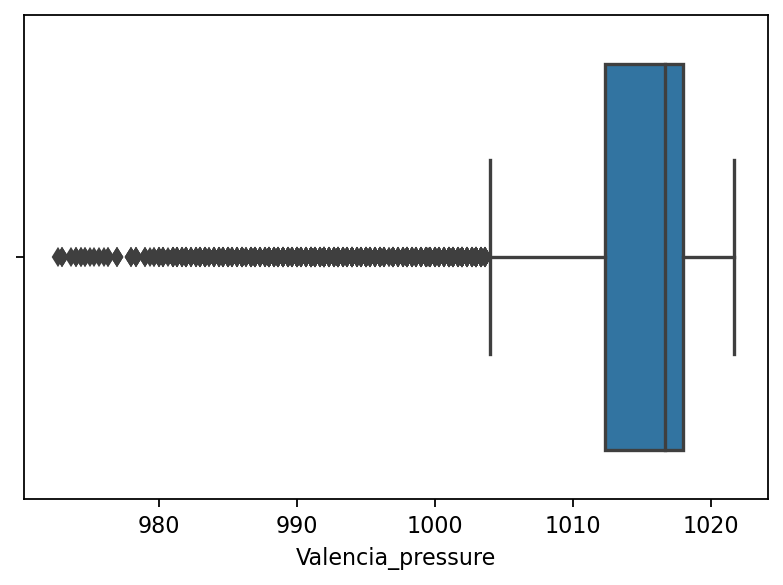

In [342]:
sns.boxplot(df_clean['Valencia_pressure'])

Valencia_pressure is shown above and the median is closer to the top of the box, then the distribution is negatively skewed (skewed left).

In [343]:
#convert time object column to datetime column
df_clean['time']=pd.to_datetime(df_clean['time'])
df_clean['year']=pd.DatetimeIndex(df_clean.time).year
df_clean['month']=pd.DatetimeIndex(df_clean.time).month
df_clean['day']=pd.DatetimeIndex(df_clean.time).day
df_clean['hour']=pd.DatetimeIndex(df_clean.time).hour

df_clean = df_clean.drop(['time'], axis = 1)

In [344]:
df_clean

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,year,month,day,hour
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.0,223.333333,...,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.0,221.000000,...,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,6
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.0,214.333333,...,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,9
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.0,199.666667,...,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1,12
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.0,185.000000,...,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0.333333,9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.0,70.000000,...,276.483333,276.150000,279.816667,274.910000,271.150000,NaN,2018,12,31,9
2916,0.333333,8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.0,36.666667,...,285.816667,278.816667,287.150000,283.156667,280.483333,NaN,2018,12,31,12
2917,1.000000,6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,0.0,14.666667,...,288.150000,285.816667,290.816667,287.733333,286.483333,NaN,2018,12,31,15
2918,1.000000,6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,0.0,19.000000,...,283.150000,282.816667,287.483333,283.813333,282.150000,NaN,2018,12,31,18


### Relationship Analysis

In [345]:
corelation = df_clean.corr()

<AxesSubplot:>

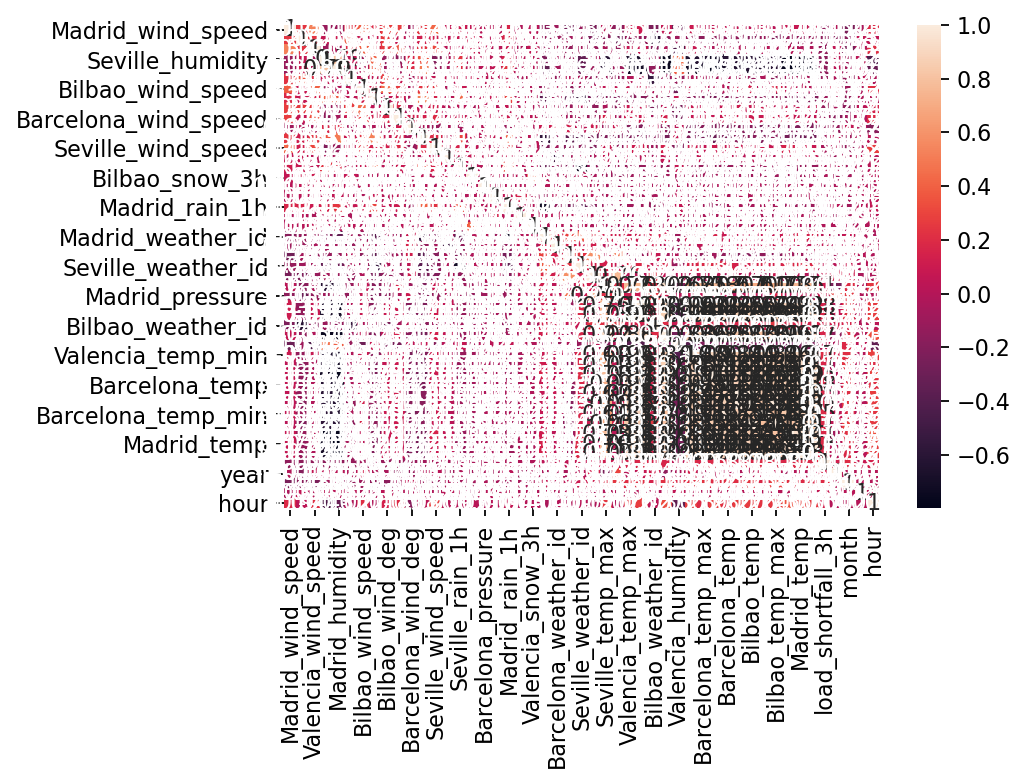

In [346]:
sns.heatmap(corelation,annot =True)

The heat map is not pretty defing our data well, so we can not rely on it.

ValueError: num must be 1 <= num <= 44, not 45

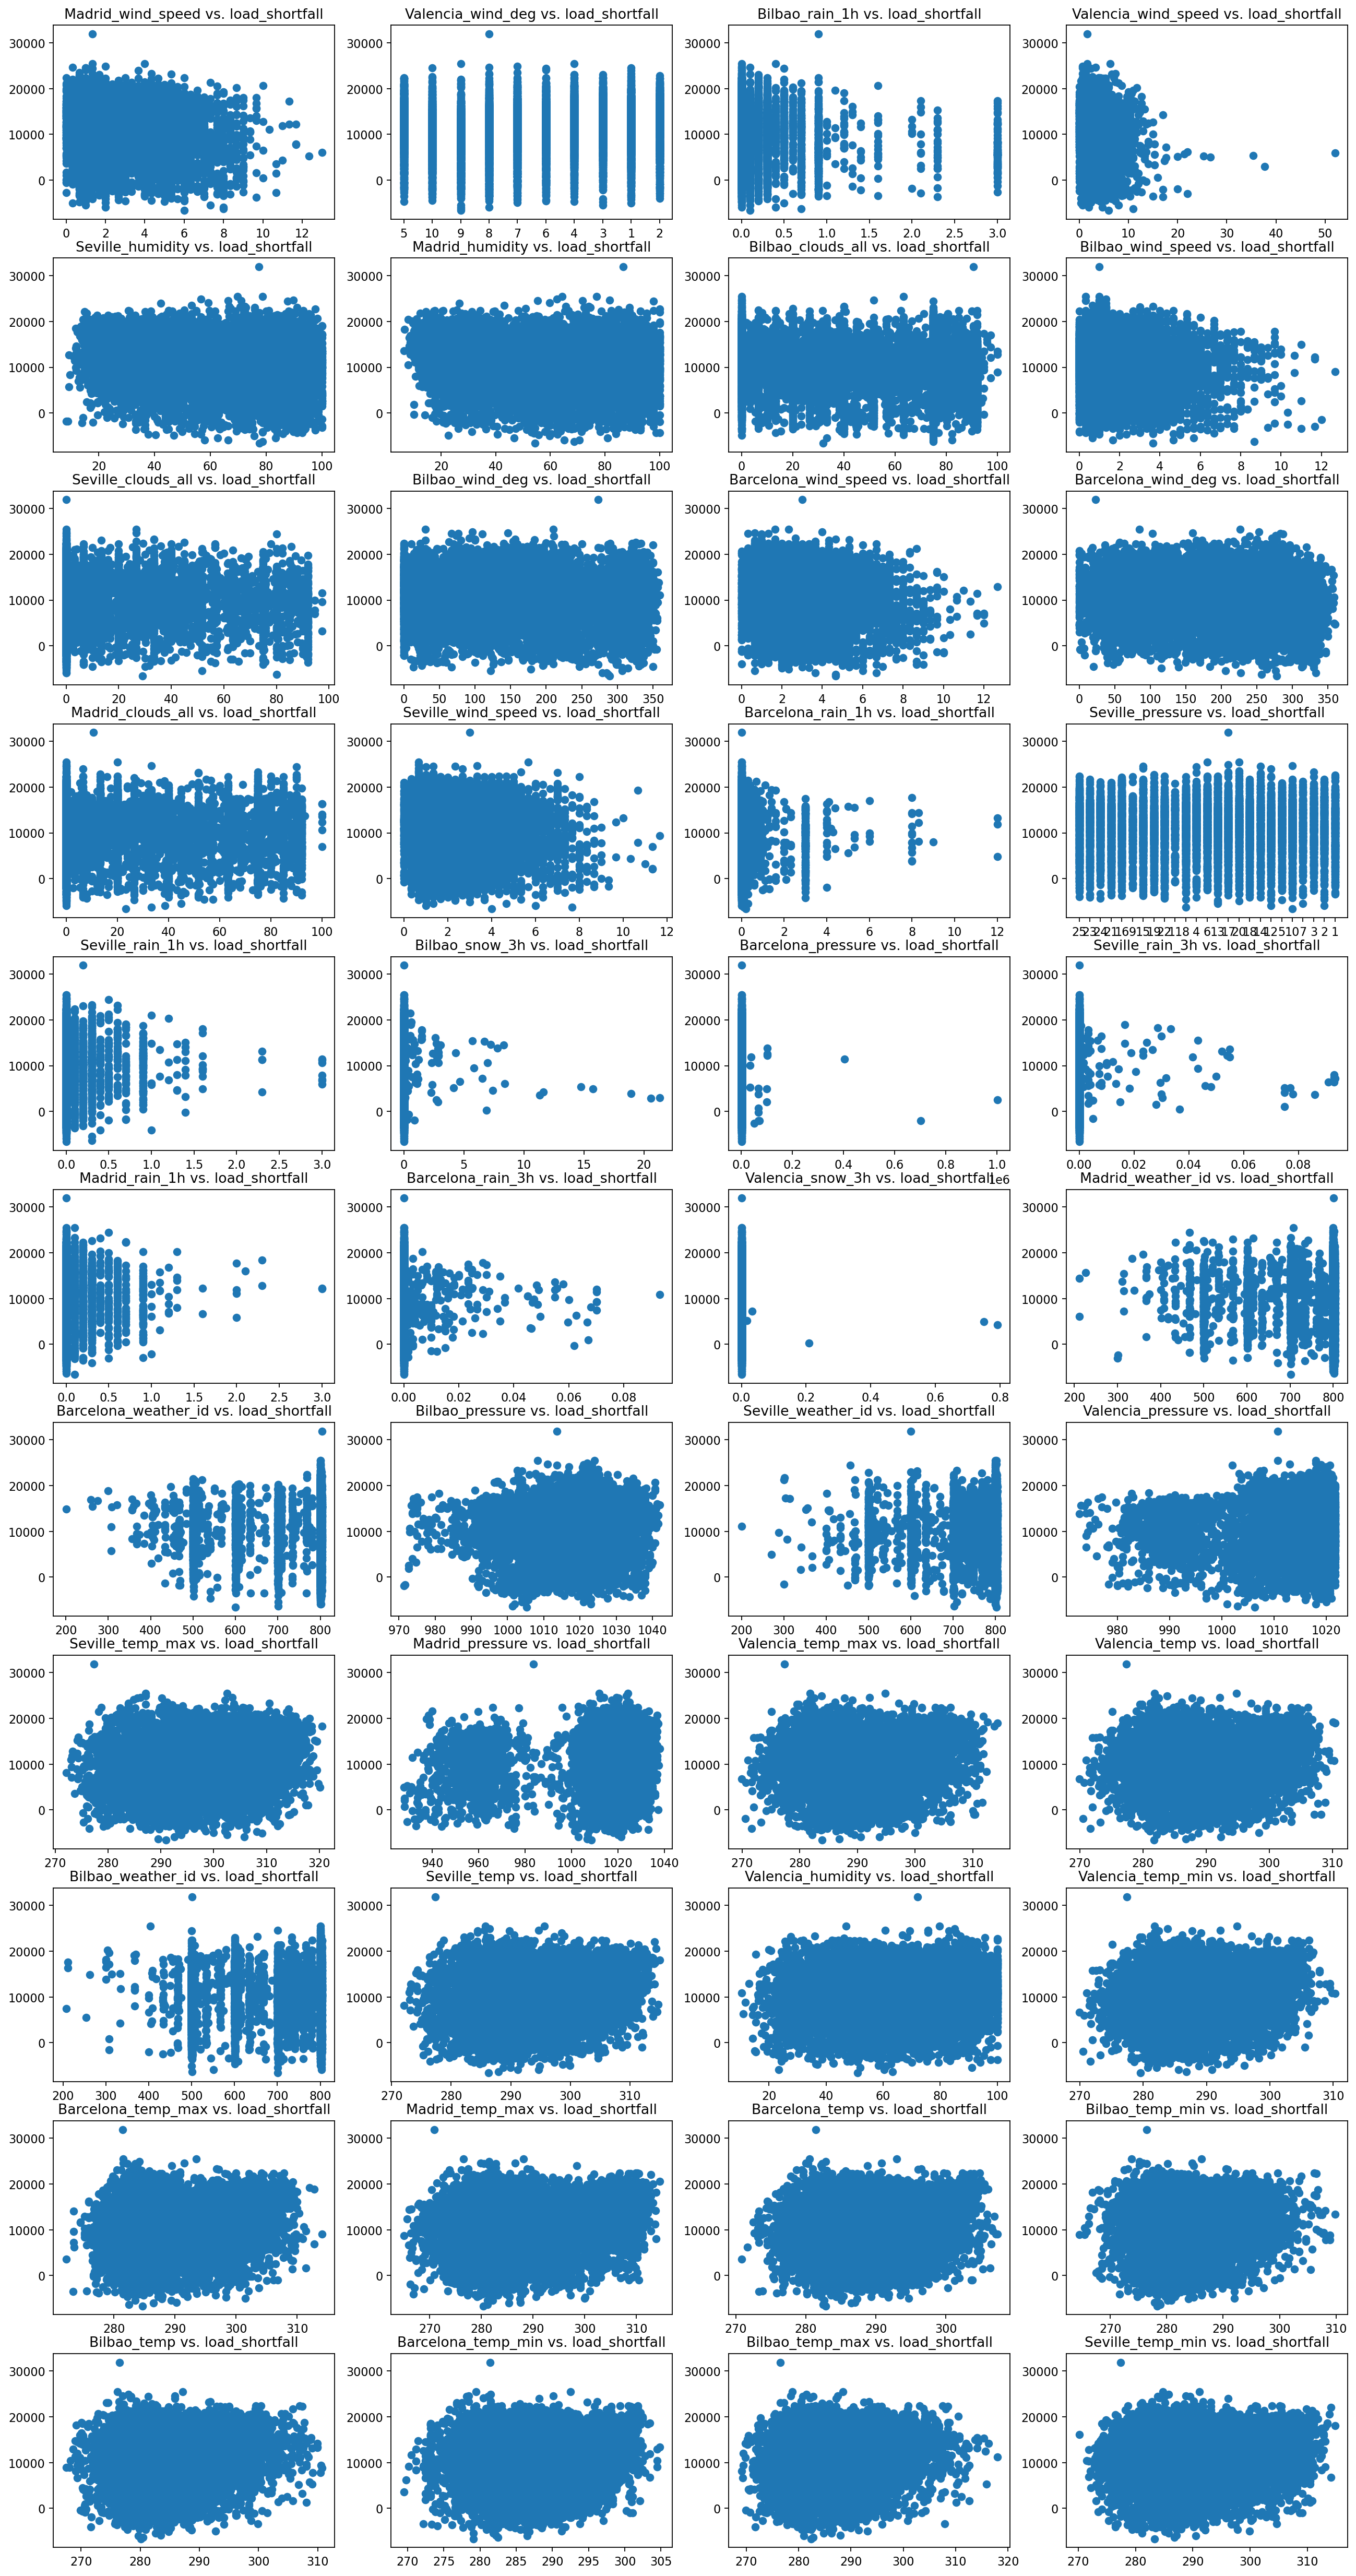

In [348]:
plt.figure(figsize=(20,40))
for index,col in enumerate(df_clean.columns):
    plt.subplot(11,4,index+1)
    plt.title("{} vs. load_shortfall".format(col))
    plt.scatter(df_clean[col],df_clean['load_shortfall_3h'])

The Scatter plots above shows the distribution of data for each feature against the load_shortfall_3h.

### having a look at feature distributions using Histogram

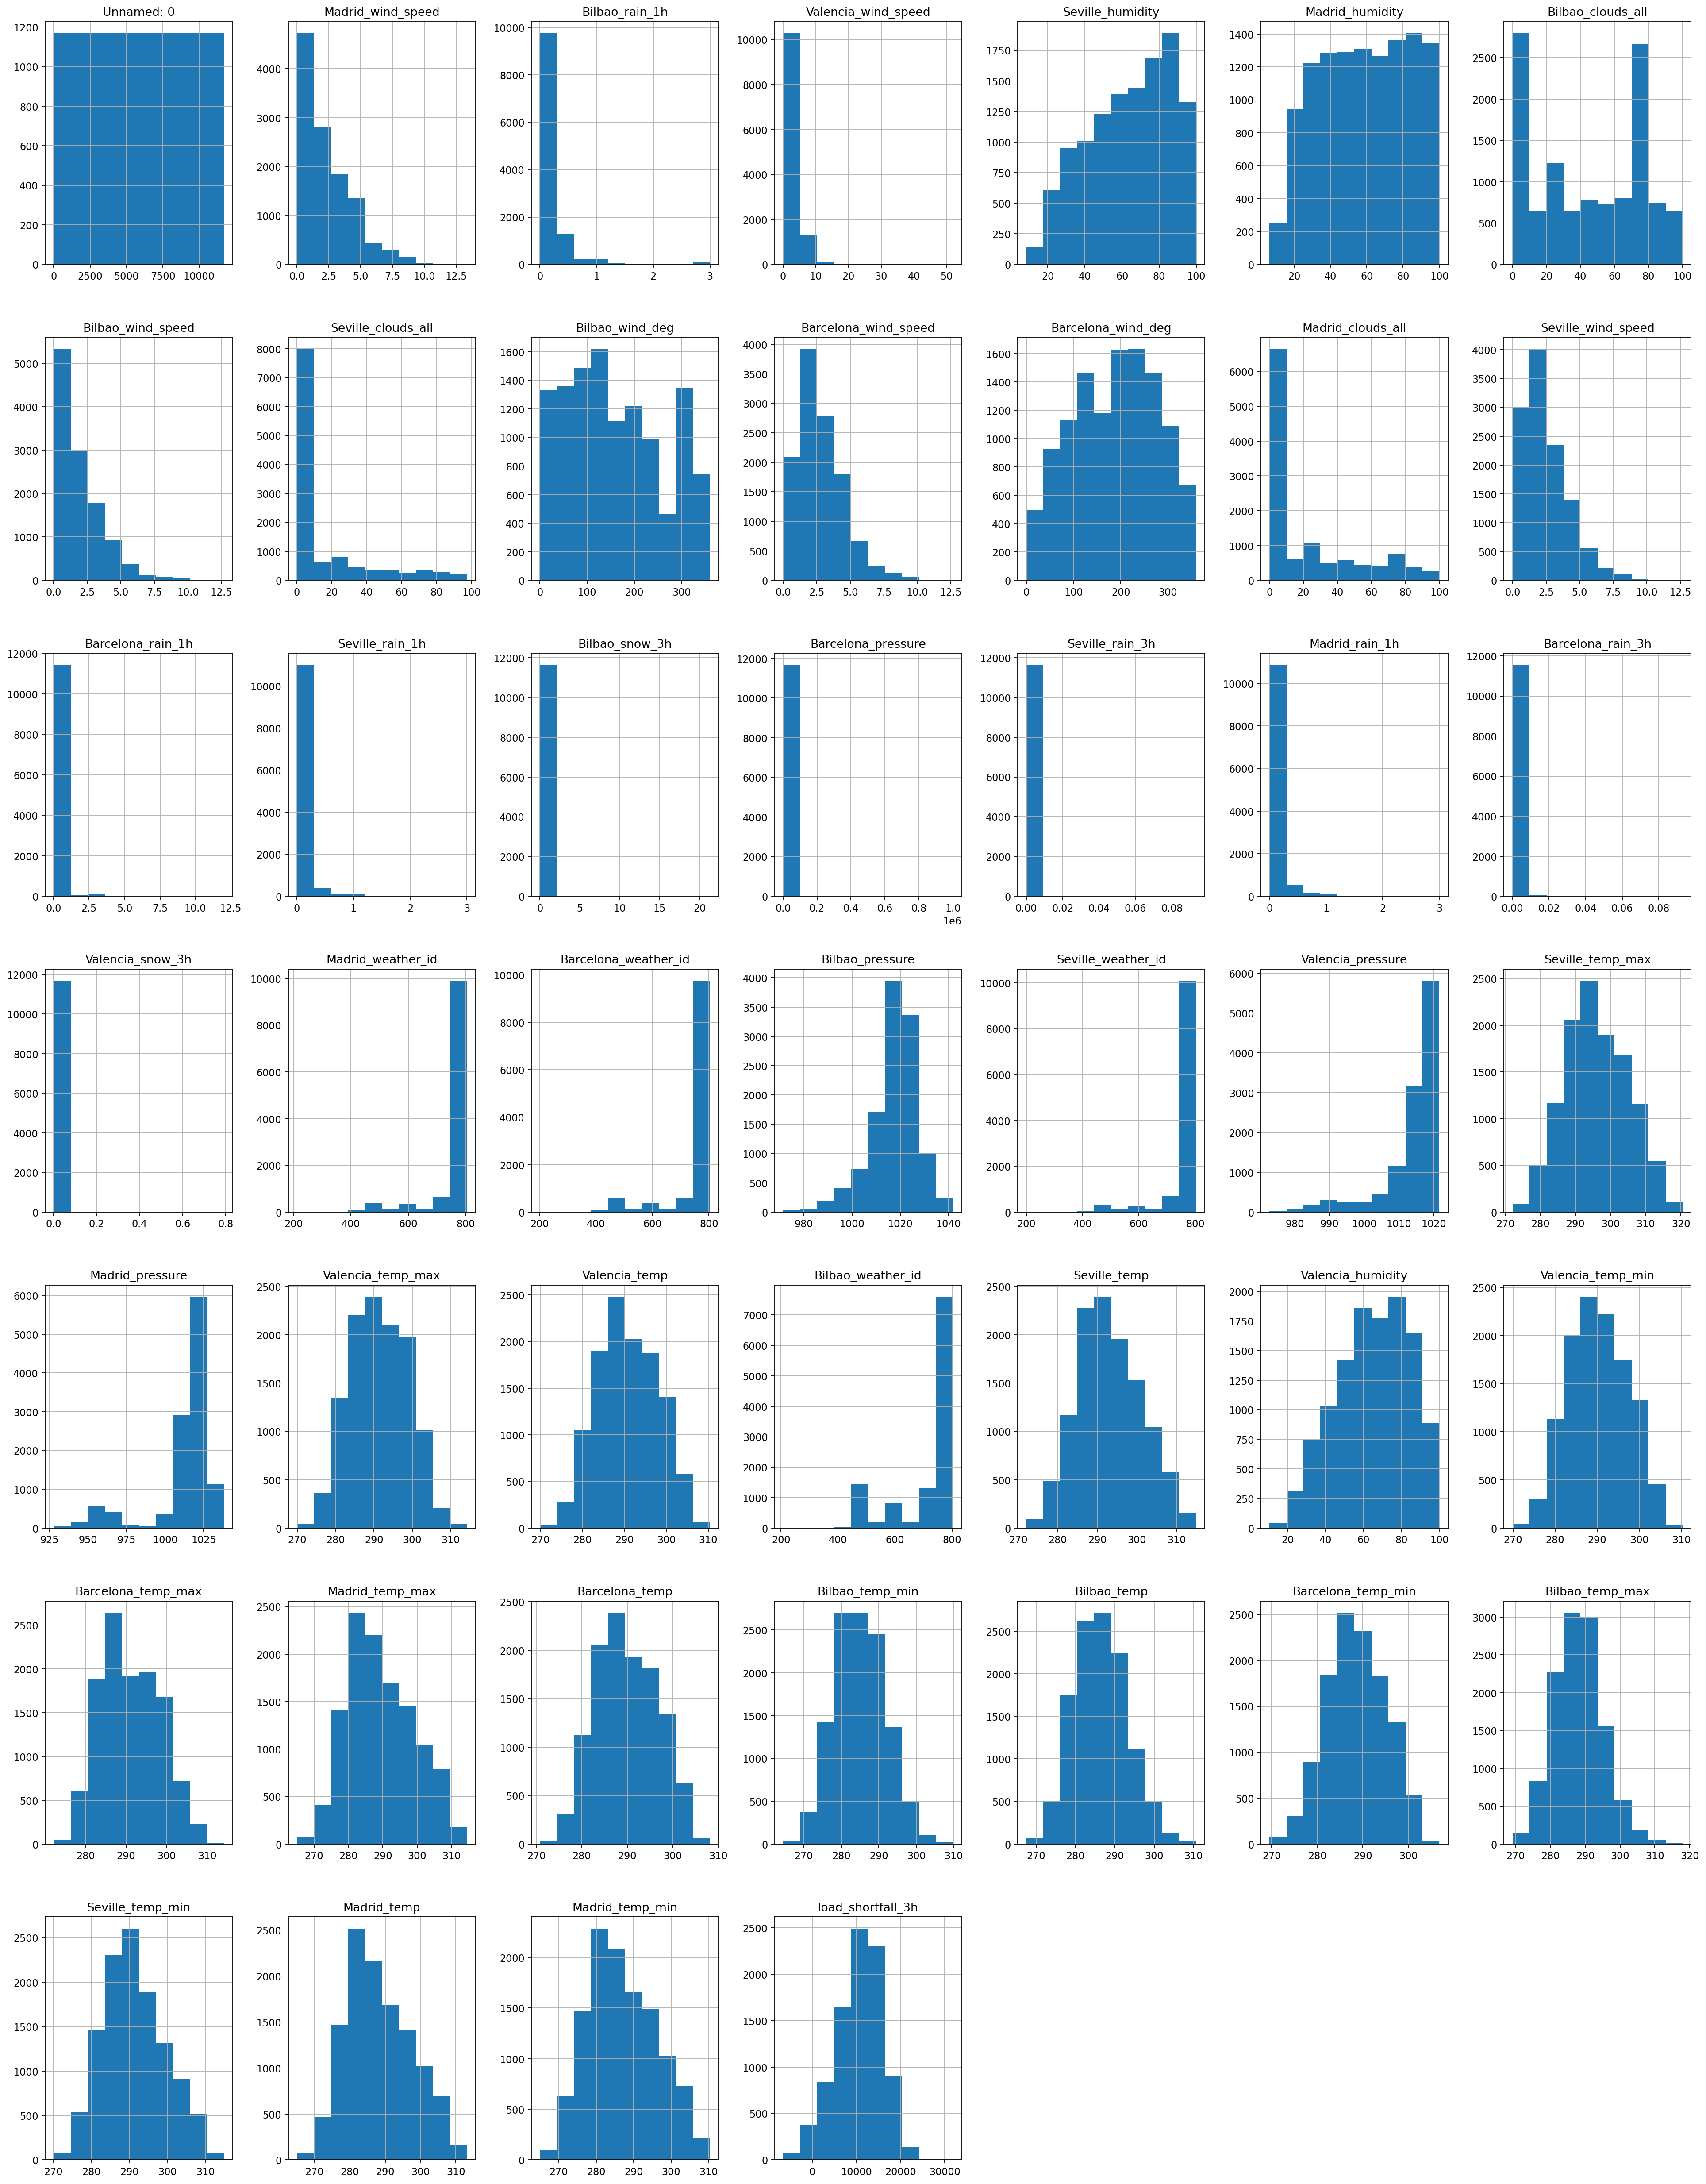

In [349]:
features = df.columns 
df[features].hist(figsize=(30,40));

The histogram, as illustrated in the diagram above, is used to check the distribution of characteristics in a given dataset. Because most of the offered characteristics utilize a different scale or the data is not standardized, our data is not in a proper format, as seen in the picture above. The load shortfall 3h column's normal distribution shows that the load shortfall is more likely to be in the range of 9000 to 13000 since the likelihood is higher there.

## Now to prepare to model

In [350]:
y = df_clean[:len(train_data)][['load_shortfall_3h']]

x = df_clean[:len(train_data)].drop('load_shortfall_3h',axis=1)

x_train = df_clean[:len(train_data)].drop('load_shortfall_3h',axis=1)
x_test = df_clean[len(train_data):].drop('load_shortfall_3h',axis=1)

In [351]:
x.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month,day,hour
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,2015,1,1,3
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,2015,1,1,6
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,2015,1,1,9
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,2015,1,1,12
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,2015,1,1,15


In [352]:
y.head()

,load_shortfall_3h
0,6715.666667
1,4171.666667
2,4274.666667
3,5075.666667
4,6620.666667


# 5. Building Models

Now we are finally ready, and we can train our models

Three models were tried in this project: 

<br> **1) Linear Regression** 

In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.

<br> **2) Desicion Tree Regressor**

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. 

<br> **3) Random Forest Regressor**

Random forest is a type of supervised learning algorithm that uses ensemble methods (bagging) to solve both regression and classification problems. The algorithm operates by constructing a multitude of decision trees at training time and outputting the mean/mode of prediction of the individual trees.

<br> **4) Ridge model**

Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where independent variables are highly correlated.


<br> **5) Lasso model**

Lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.


The model is fed both with the data (x_train) and the answers for that data (y_train)

## Model Evaluation
Evaluating performance of the machine learning model that we have built is an essential part of any machine learning project. Performance of our model is done using some evaluation metrics.

There are so many evaluation metrics to use for regression problem, however, the evaluation metric for this competition is **Root Mean Square Error**. Root Mean Square Error (RMSE) is commonly used in regression analysis and forecasting and measures the standard deviation of the residuals arising between predicted and actual observed values for a modeling process.

In [353]:
# Using just the training dataset to test model accuracy 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.1) 

### 1) Linear Regression Model

In [354]:
start = timeit.default_timer()

lr = LinearRegression()

# Train the model
lr.fit(x_train, y_train)

pred = lr.predict(x_test)

stop = timeit.default_timer()
execution_time_linear = stop - start

print("Program Executed in "+str(execution_time_linear) + " seconds") # It returns time in seconds


## Evaluate Model

def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

rmse(y_test, pred)
print(rmse(y_test, pred))

from sklearn.metrics import r2_score

r2_score(y_test, pred)

Program Executed in 0.31918880000011995 seconds
4720.313293935362


0.18322721119809915

### 2) Decision Tree Regressor

In [355]:
start = timeit.default_timer()

dt = DecisionTreeRegressor()

#train the model 
dt.fit(x_train, y_train)
#Validate The Model
#Predict on the valication data 
pred_dt = dt.predict(x_test)


stop = timeit.default_timer()
execution_time_dt = stop - start

print("Program Executed in "+str(execution_time_dt) + " seconds") # It returns time in seconds

## Evaluate Model

def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

rmse(y_test, pred_dt)
print(rmse(y_test, pred_dt))

from sklearn.metrics import r2_score

r2_score(y_test, pred_dt)

Program Executed in 1.6315446000080556 seconds
4382.820857100071


0.29584697173979646

## 3) Random Forest Regressor

In [356]:
start = timeit.default_timer()

rfc = RandomForestRegressor()

#train the model 
rfc.fit(x_train, y_train)
#Validate The Model
#Predict on the valication data 
pred_rfc = rfc.predict(x_test)

stop = timeit.default_timer()
execution_time_rfc = stop - start

print("Program Executed in "+str(execution_time_rfc) + " seconds") # It returns time in seconds

## Evaluate Model

def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

rmse(y_test, pred_rfc)
print(rmse(y_test, pred_rfc))

from sklearn.metrics import r2_score

r2_score(y_test, pred_rfc)

Program Executed in 78.00228380000044 seconds
2987.1148753473412


0.6729128663042048

## 4) Ridge model

In [357]:
#create the ridge model
start = timeit.default_timer()

r = Ridge()

#train the model 
r.fit(x_train, y_train)
#Validate The Model
#Predict on the valication data 
pred_r = r.predict(x_test)

stop = timeit.default_timer()
execution_time_r = stop - start

print("Program Executed in "+str(execution_time_r) + " seconds") # It returns time in seconds

## Evaluate Model

def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

rmse(y_test, pred_r)
print(rmse(y_test, pred_r))

from sklearn.metrics import r2_score

r2_score(y_test, pred_r)

Program Executed in 0.25756389999878593 seconds
4720.552475779877


0.18314443611116749

## 3) Lasso model

In [358]:
#create the lasso model
start = timeit.default_timer()

l = Lasso(alpha=0.01)

#train the model 
l.fit(x_train, y_train)
#Validate The Model
#Predict on the valication data 
pred_l = l.predict(x_test)

stop = timeit.default_timer()
execution_time_l = stop - start

print("Program Executed in "+str(execution_time_l) + " seconds") # It returns time in seconds

## Evaluate Model

def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

rmse(y_test, pred_l)
print(rmse(y_test, pred_l))

from sklearn.metrics import r2_score

r2_score(y_test, pred_l)

Program Executed in 2.365253299998585 seconds
4720.9784354071435


0.18299701133754098

##  Hyperparameter Tuning on Performing Models

**Hyperparameter tuning** is the process by which a set of ideal hyperparameters are chosen for a model. A hyperparameter is a parameter for which the value is set manually and tuned to control the algorithm's learning process.

### 2) Random Forest Regressor

In [359]:
# 2 trees in forest
forest_1 = RandomForestRegressor(n_estimators=2, max_depth=5, random_state=23)

# 20 trees in forest
forest_2 = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=23)

# 60 trees in forest
forest_3 = RandomForestRegressor(n_estimators=60, max_depth=5, random_state=23)

# 100 trees in forest
forest_4 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=23)

In [360]:
forest_1.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=2, random_state=23)

In [361]:
forest_2.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=20, random_state=23)

In [362]:
forest_3.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=60, random_state=23)

In [363]:
forest_4.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=23)

#### Model Evaluation

Actual vs Expected

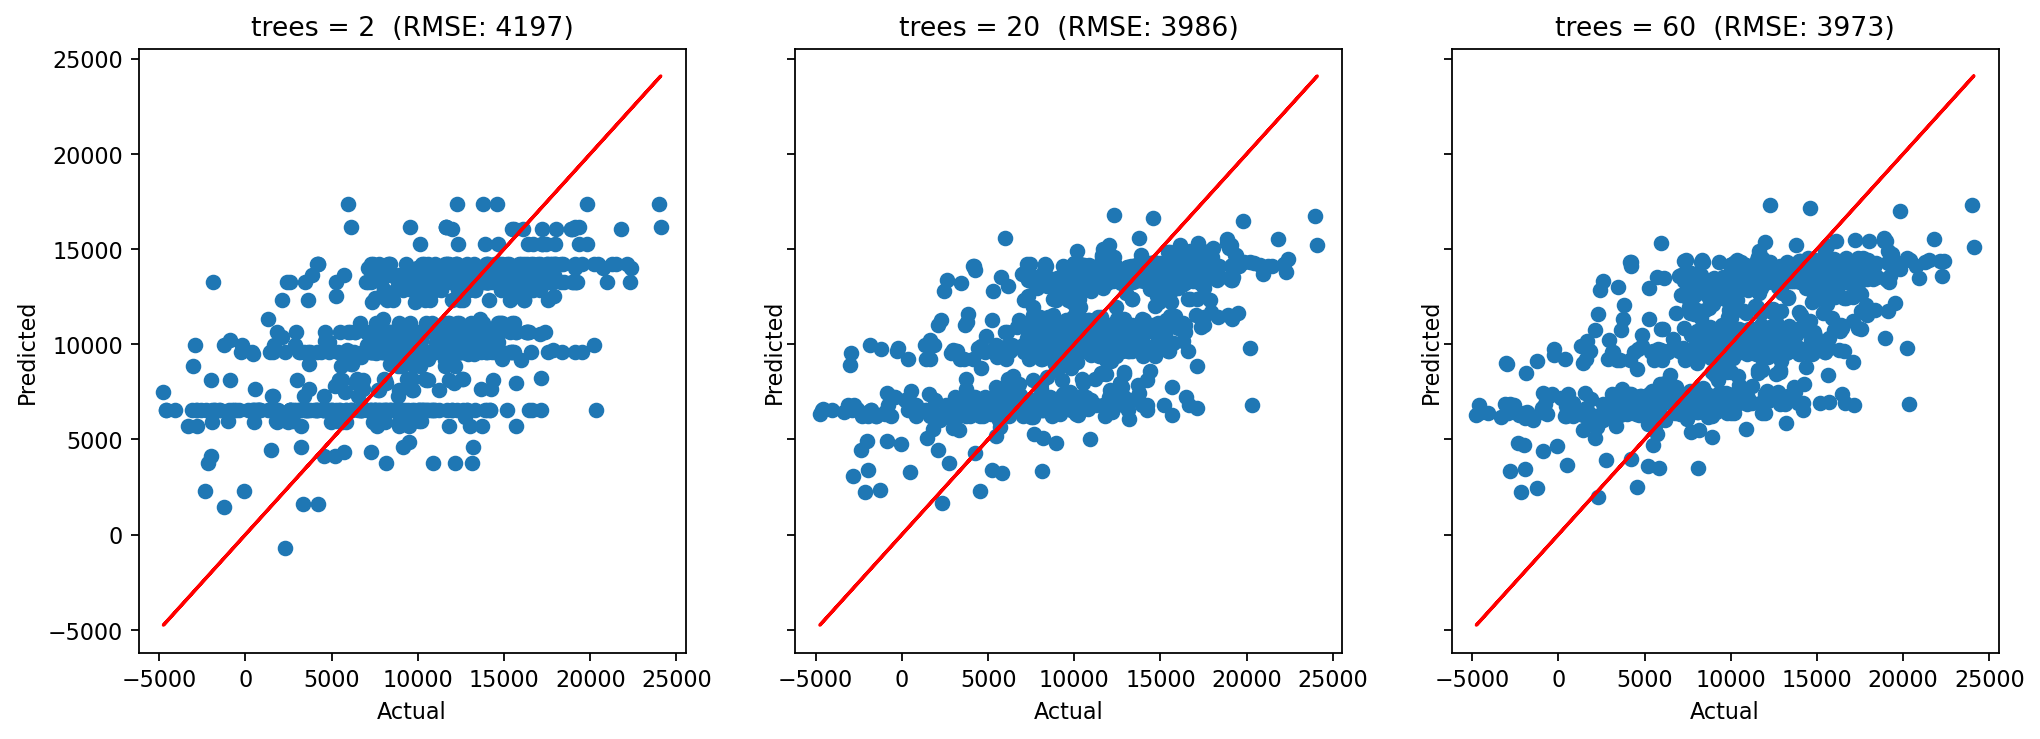

In [364]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3,sharey=True)

# Create list of titles and predictions to use in for loop
predy = [forest_1.predict(x_test), forest_2.predict(x_test), forest_3.predict(x_test),forest_4.predict(x_test)]
title = ['trees = 2', 'trees = 20', 'trees = 60','trees = 100']

# Loop through all axes to plot each model's results 
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(predy[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,predy[i])

After performing the hyperparameter tuning of the random forest, there was no significant change in the **RMSE**.

In [365]:
# Dictionary of results
results_dict ={'Test MSE': { 
                    
                        "Linear regression": np.sqrt(metrics.mean_squared_error(y_test, pred)),
                        "Ridge": np.sqrt(metrics.mean_squared_error(y_test, pred_r)),
                        "LASSO": np.sqrt(metrics.mean_squared_error(y_test, pred_l)),
                        "Decision tree": np.sqrt(metrics.mean_squared_error(y_test, pred_dt)),
                        "Random Forest": np.sqrt(metrics.mean_squared_error(y_test,pred_rfc))
                    },'R_Squared':


{
                        "Linear regression":r2_score(y_test, pred),
                        "Ridge": r2_score(y_test, pred_r),
                        "LASSO":r2_score(y_test, pred_l),
                        "Decision tree":r2_score(y_test, pred_dt),
                        "Random Forest":r2_score(y_test,pred_rfc)
                       }}
                

final_score = pd.DataFrame(data=results_dict)
#final_score = pd.DataFrame(results_dict.items(), columns=['Model', 'Test MSE','R'])
ordered_df = final_score.sort_values('Test MSE', ascending=True)
ordered_df

,Test MSE,R_Squared
Random Forest,2987.114875,0.672913
Decision tree,4382.820857,0.295847
Linear regression,4720.313294,0.183227
Ridge,4720.552476,0.183144
LASSO,4720.978435,0.182997


##  Model Selection 

![](desi.jpg)

Final Model Evaluation df

# 6. Conclusion 

![](word.jpg)

#### Predict Conclusion

In this predict, a supervised machine learning model was build. we analyzed our models' performance and choose the best model. A dictionary comprising the estimated RMSE was built for each model in order to assess its performance. The Random forest model has a lower RMSE than other models, implying that it has a greater prediction accuracy. As a result, in comparison to the other models established in this study, we can infer that the random forest model is the best.


# 7. Submission

#### Code for making a submission

In [366]:
x_train = df_clean[:len(train_data)].drop('load_shortfall_3h',axis=1)
x_test = df_clean[len(train_data):].drop('load_shortfall_3h',axis=1)

In [367]:
rfc.fit(x_train,y)

pred_rfc = rfc.predict(x_test)

In [368]:
daf=pd.DataFrame(pred_rfc, columns=['load_shortfall_3h'])
daf.head()

,load_shortfall_3h
0,11122.053333
1,7642.903333
2,7280.836667
3,10404.690000
4,12467.226667


In [369]:
#output = pd.DataFrame({"time":test_data['time']})
#submission = output.join(daf)        
#submission.to_csv("submissionrfc3.csv", index=False)

In [370]:
#submission